
# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;





# Comportamiendo de los usuarios en una app de productos alimenticios

Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

# Diccionario de datos:

EventName: nombre del evento.

DeviceIDHash: identificador de usuario unívoco.

EventTimestamp: hora del evento.

ExpId: número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.

In [2]:
# Importamos las librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
import math as mth
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

## Paso 1: Abrir y leer el archivo del dataframe

In [3]:
# Importamos los dataframes de la compañia

data = pd.read_csv('/datasets/logs_exp_us.csv',delimiter='\t')

## Paso 2: Pre-procesamiento de los datos 

In [4]:
# Analizamos el dataframe a traves de la creación de una variable:

def analisis_datos (data):
    print(data.head())
    print()
    print(data.info())
    print()
    print(data.describe())
    print()
    print('valores ausentes:',)
    print(data.isna().sum())
    print()
    print('filas duplicadas:', data.duplicated().sum())

In [5]:
analisis_datos (data)

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

       DeviceIDHash  EventTimestamp          ExpId
count  2.441260e+05    2.441260e+05  244126.000000
mean   4.627568e+18    1.564914e+09

In [6]:
# Limpiamos los datos y los estandarizamos:
def limpiar_columnas(data):
    new_columns = []
    
    for columna in data.columns:

        
        # Verificamos si la columna está en la lista de nombres específicos y renombramos
        if columna in ['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId']:
            mapa_nombres = {
                'EventName': 'event_name',
                'DeviceIDHash': 'device_id_hash',
                'EventTimestamp': 'event_timestamp',
                'ExpId': 'exp_id'
            }
            columna_limpia = mapa_nombres[columna]
        
        new_columns.append(columna_limpia)
    
    # Asignamos las nuevas columnas al DataFrame
    data.columns = new_columns
    
    return data

In [7]:
limpiar_columnas(data)

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [8]:
analisis_datos (data)

                event_name       device_id_hash  event_timestamp  exp_id
0         MainScreenAppear  4575588528974610257       1564029816     246
1         MainScreenAppear  7416695313311560658       1564053102     246
2  PaymentScreenSuccessful  3518123091307005509       1564054127     248
3         CartScreenAppear  3518123091307005509       1564054127     248
4  PaymentScreenSuccessful  6217807653094995999       1564055322     248

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

       device_id_hash  event_timestamp         exp_id
count    2.441260e+05     2.441260e+05  244126.000000
mean     4.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Excelente trabajo! La implementación de la función analisis_datos es clara y realiza una inspección inicial exhaustiva del dataframe. Has considerado aspectos importantes como los valores nulos, las filas duplicadas, y las estadísticas descriptivas. Además, el uso de la función limpiar_columnas para estandarizar y renombrar las columnas es una excelente práctica que mejora la legibilidad del código. Continúa aplicando estas buenas prácticas en el resto del análisis.
</div>

### Valores duplicados

In [9]:
# Observar TODOS los datos duplicados:

duplicate_rows = data[data.duplicated()]
duplicate_rows.count()

event_name         413
device_id_hash     413
event_timestamp    413
exp_id             413
dtype: int64

In [10]:
# Duplicados por grupos

#Grupo control: 246

duplicate_rows_246 = duplicate_rows.query('exp_id == 246')
duplicate_rows_246.count()

event_name         123
device_id_hash     123
event_timestamp    123
exp_id             123
dtype: int64

In [11]:
# Duplicados por grupos

#Grupo control 2: 247

duplicate_rows_247 = duplicate_rows.query('exp_id == 247')
duplicate_rows_247.count()

event_name         125
device_id_hash     125
event_timestamp    125
exp_id             125
dtype: int64

In [12]:
# Duplicados por grupos

#Grupo nuevo: 248

duplicate_rows_248 = duplicate_rows.query('exp_id == 248')
duplicate_rows_248.count()

event_name         165
device_id_hash     165
event_timestamp    165
exp_id             165
dtype: int64

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen trabajo al identificar y contar los valores duplicados en los datos. Utilizar query para separar los duplicados por grupo es una práctica eficiente para manejar el análisis por segmentos. Esto te permitirá abordar los duplicados de manera más organizada y tomar decisiones específicas por grupo. ¡Sigue así!
</div>

### Modificar las fechas y horas

In [13]:
# Crear una columna con la fecha y la hora

data['date_hour'] = pd.to_datetime(data['event_timestamp'], unit='s')

In [14]:
# crear columna con fecha

data['date'] = data['date_hour'].dt.date

data['date'] = pd.to_datetime(data['date'])

In [15]:
data

,event_name,device_id_hash,event_timestamp,exp_id,date_hour,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   device_id_hash   244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   exp_id           244126 non-null  int64         
 4   date_hour        244126 non-null  datetime64[ns]
 5   date             244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


In [17]:
# Revisar la fehca inicial del analisis a la fecha final

print(data['date_hour'].min())
print(data['date_hour'].max())

2019-07-25 04:43:36
2019-08-07 21:15:17


**Conclusiones del Pre-Procesamiento de datos:** El dataframe contiene **244.125** datos, distribuidos en 4 columnas, se estandarizaron y se modificaron los nombres de las columnas, se creo una nueva columna con la fecha y otra con la fecha y la hora. Ademas se analizo que no hay valores ausentes en los datos, sin embargo si se encontró **413** valores duplicados en los datos distribuidos en Grupo control (246 -247) : **248** datos duplicados y en el grupo nuevo(248) se encontraron **165** duplicados. No se realiza a eliminar los duplicados ya que podemos perder datos que nos pueden ser utiles para los análisis posteriores.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Excelente trabajo! Has realizado correctamente la conversión de las fechas y horas a un formato adecuado y has creado columnas adicionales para facilitar el análisis. Además, el análisis de duplicados es adecuado y justificado. La decisión de no eliminar los duplicados también es razonable, dado que podrían ser útiles en el análisis posterior. ¡Bien hecho!
</div>

## Paso 3. Estudiar y comprobar los datos

### ¿Cuántos eventos hay en los registros?

In [18]:
# Para obtener el número de eventos simplemente debemos contar el número de flas, ya que cada fila representa un evento

total_events = data['event_name'].count()

print(f'El total de eventos es de: {total_events}')

El total de eventos es de: 244126


In [19]:
data['event_name'].head(10)

0           MainScreenAppear
1           MainScreenAppear
2    PaymentScreenSuccessful
3           CartScreenAppear
4    PaymentScreenSuccessful
5           CartScreenAppear
6         OffersScreenAppear
7           MainScreenAppear
8           MainScreenAppear
9           MainScreenAppear
Name: event_name, dtype: object

In [20]:
# Agrupamos los datos por event_name, por las fechas en que se realizaron y los contamos 

type_of_event = data.groupby('event_name')['date'].count()
type_of_event

event_name
CartScreenAppear            42731
MainScreenAppear           119205
OffersScreenAppear          46825
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: date, dtype: int64

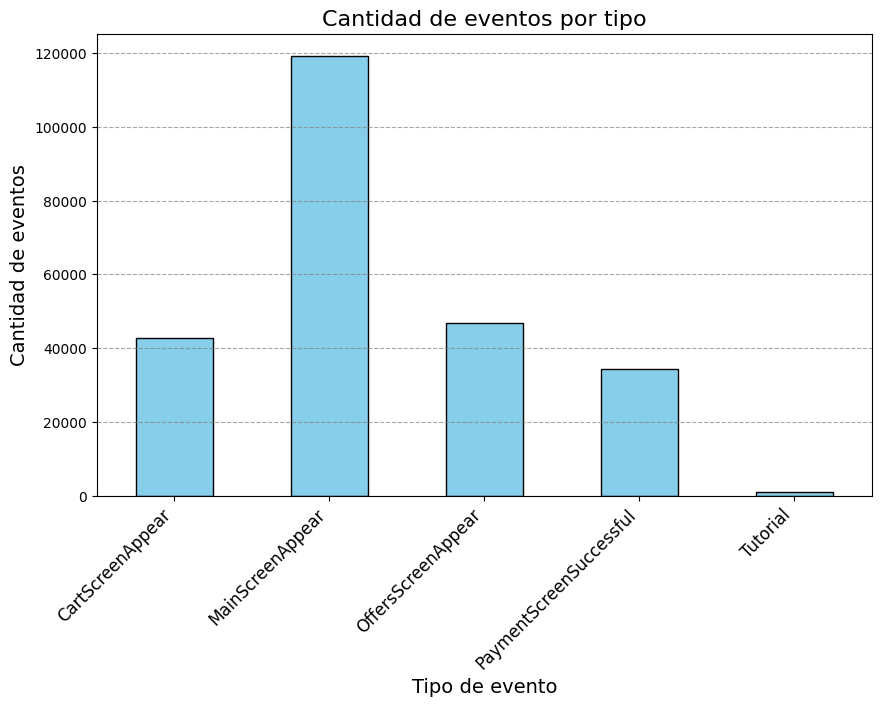

In [21]:
# Crear la gráfica de barras
type_of_event.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# Título y etiquetas
plt.title('Cantidad de eventos por tipo', fontsize=16)
plt.xlabel('Tipo de evento', fontsize=14)
plt.ylabel('Cantidad de eventos', fontsize=14)

# Agregar líneas horizontales con plt.grid

plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right', fontsize=12)

# Mostrar la gráfica
plt.show()

El proceso de la venta de productos alimenticios tiene 5 eventos, el evento que mas se repite es **'MainScreenAppear'**. Además se observa que el evento con menor frecuencia es 'Tutorial' esto puede ser a que los usuarios no necesitan ver el tutorial sino que ya saben como manejar la pagina

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen trabajo en el análisis de los eventos. Has utilizado correctamente las funciones de conteo y agrupación para obtener información clave sobre la frecuencia de los eventos. Además, la visualización con la gráfica de barras es clara y útil para comprender la distribución de los eventos. La interpretación de los resultados también es adecuada y muestra una comprensión de la dinámica de los usuarios en la plataforma. ¡Sigue así!
</div>

### ¿Cuántos usuarios y usuarias hay en los registros?

Para saber cuántos usuarios únicos hay en los registros, utilizamos la columna que identifica a cada usuario de manera única, que en este caso es device_id_hash

In [22]:
# Contar el número de usuarios únicos en la columna 'device_id_hash'

total_users = data['device_id_hash'].nunique()
print(f'El total de usuarios/usuarias es de: {total_users}')

El total de usuarios/usuarias es de: 7551


In [23]:
# Contar los usuarios por eventos:

users_per_event = data.groupby('event_name')['device_id_hash'].nunique()
users_per_event

event_name
CartScreenAppear           3749
MainScreenAppear           7439
OffersScreenAppear         4613
PaymentScreenSuccessful    3547
Tutorial                    847
Name: device_id_hash, dtype: int64

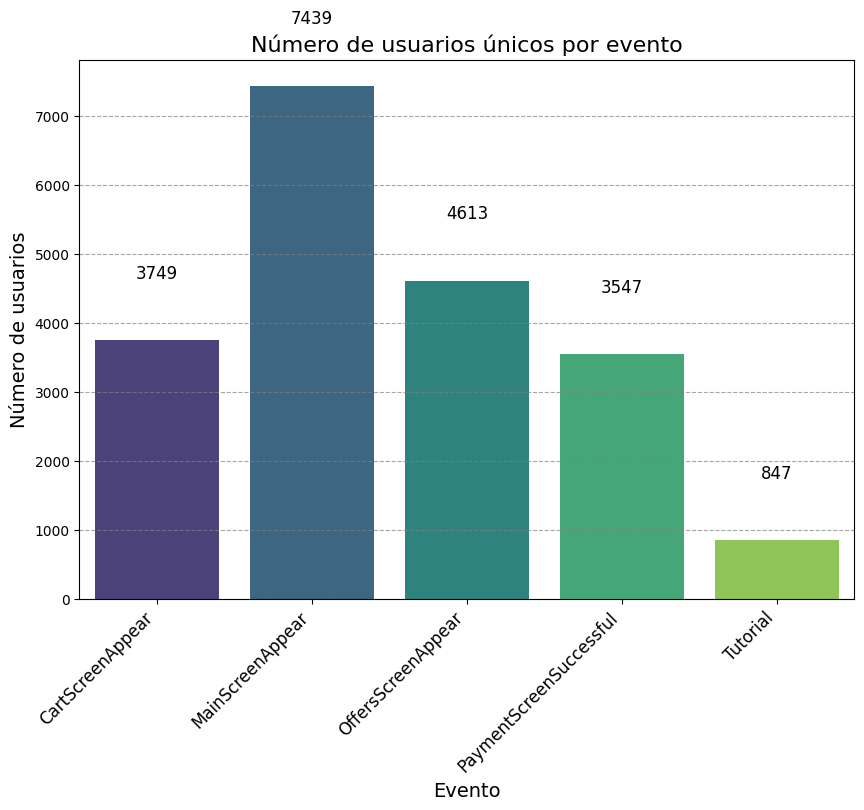

In [24]:
# Crear la gráfica de barras
plt.figure(figsize=(10, 7))
sns.barplot(x=users_per_event.index, y=users_per_event.values, palette='viridis')

# Agregar líneas horizontales
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Mostrar los valores en cada barra
for i, value in enumerate(users_per_event.values):
    plt.text(i, value + 900, str(value), ha='center', fontsize=12, color='black')

# Título y etiquetas
plt.title('Número de usuarios únicos por evento', fontsize=16)
plt.xlabel('Evento', fontsize=14)
plt.ylabel('Número de usuarios', fontsize=14)

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right', fontsize=12)

# Mostrar la gráfica
plt.show()

Se puede observar en la gráfica que hay 7.551 usuarioslo los cuales se encuentran divididos por diferentes eventos, sin embargo se puede observar que los usuarios realizaron mas el evento de: MainscreenApperar y nuevamente el menor es Tutorial

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen análisis al contar los usuarios únicos y agruparlos por evento. La gráfica es clara y muestra bien la distribución de usuarios por evento. La interpretación de los resultados es precisa, destacando correctamente los eventos más frecuentes. ¡Sigue así!
</div>

### ¿Cuál es el promedio de eventos por usuario?

In [25]:
# Se divide el tipo de eventos entre los usuarios por evento 

users_mean = (type_of_event / users_per_event).round(2)
users_mean

event_name
CartScreenAppear           11.40
MainScreenAppear           16.02
OffersScreenAppear         10.15
PaymentScreenSuccessful     9.67
Tutorial                    1.24
dtype: float64

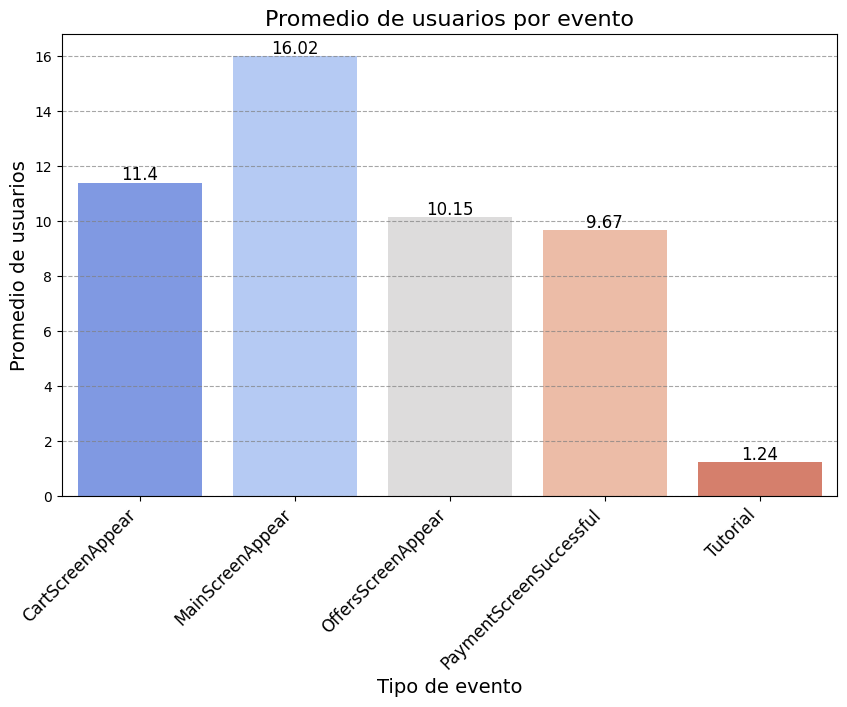

In [26]:

# Crear la gráfica de barras con 'users_mean'
plt.figure(figsize=(10, 6))

# Utilizamos una paleta de colores diferente, como 'coolwarm'
sns.barplot(x=users_mean.index, y=users_mean.values, palette='coolwarm')

# Agregar líneas horizontales
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)

# Mostrar los valores en cada barra
for i, value in enumerate(users_mean.values):
    plt.text(i, value + 0.1, str(value), ha='center', fontsize=12, color='black')

# Título y etiquetas
plt.title('Promedio de usuarios por evento', fontsize=16)
plt.xlabel('Tipo de evento', fontsize=14)
plt.ylabel('Promedio de usuarios', fontsize=14)

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45, ha='right', fontsize=12)

# Mostrar la gráfica
plt.show()

El promedio de eventos por usuario fue calculado y se presenta en el anterior grafico, donde Main Screen tiene un promedio de 16.02, seguido de Cart con un promedio de, 11.4, después sigue Offer con un promedio de 10.15, luego Payment con un promedio de 9.67 y finalmente Tutorial con un promedio de 1.24 eventos por usuario

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen cálculo del promedio de eventos por usuario. La visualización es efectiva y facilita la comparación entre los diferentes eventos. La interpretación es precisa, destacando correctamente los eventos con mayor y menor frecuencia. ¡Sigue así!
</div>

### ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora.

In [27]:
date_min = data['date_hour'].min()
print(f'La fecha de inicio es: {date_min}')
date_max = data['date_hour'].max()
print(f'La fecha final es: {date_max}')

La fecha de inicio es: 2019-07-25 04:43:36
La fecha final es: 2019-08-07 21:15:17


 #### Traza un histograma por fecha y hora.

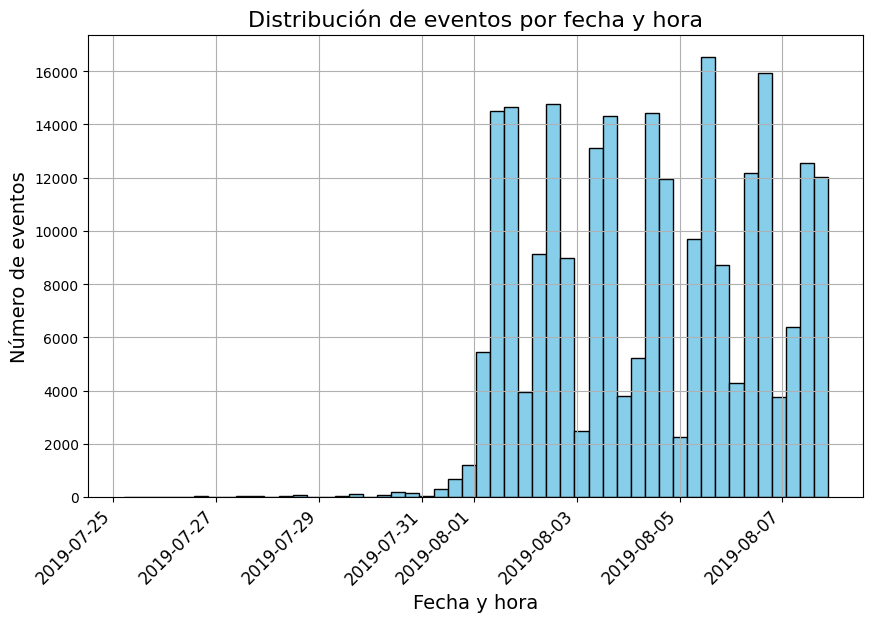

In [28]:
# Crear el histograma por fecha y hora
plt.figure(figsize=(10, 6))
plt.hist(data['date_hour'], bins=50, color='skyblue', edgecolor='black')

# Título y etiquetas
plt.title('Distribución de eventos por fecha y hora', fontsize=16)
plt.xlabel('Fecha y hora', fontsize=14)
plt.ylabel('Número de eventos', fontsize=14)

# Mostrar la gráfica
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True)
plt.show()

El anterioir Histograma nos muestra la cantidad de eventos que ocurrieron en cada intervalo de tiempo. En el grafico se puede observar que hay periodos de tiempo en donde hay muy pocos eventos registrado, ya que en realidad se observa que se empezaron a registrar en mayor proporcion desde agosto del 2019

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen trabajo al identificar el periodo de tiempo cubierto por los datos y al trazar el histograma. La visualización es clara y muestra de forma efectiva la distribución de los eventos en el tiempo. La interpretación también es adecuada, destacando el patrón de aumento de eventos a partir de agosto de 2019. ¡Sigue así!
</div>

 #### Determinar el momento en que los datos están completos

Para averiguar si los datos son completos, revisaremos si hay un período donde los eventos comienzan a ser más frecuentes o regulares. Si hay un período de baja actividad al inicio, podría ser por razones técnicas o problemas en el registro de los datos.

In [29]:
# filtrar datos entre las fechas de inicio y final 

start_date = '2019-07-25'
final_date = '2019-08-07'

filter_date = (data['date'] >= start_date) & (data['date'] <= final_date)
filter_date = data[filter_date]

In [30]:
#  contar eventos por dia 
events_per_day = filter_date.groupby('date')['event_name'].count()
events_per_day

date
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
Name: event_name, dtype: int64

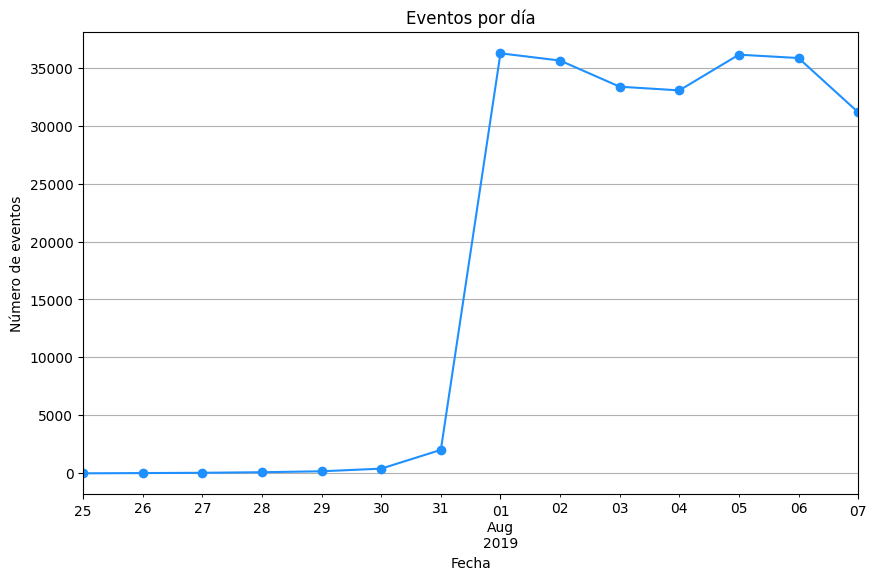

In [31]:
# grafico de lineas 
events_per_day.plot(
    title='Eventos por día', 
    xlabel='Fecha', 
    ylabel='Número de eventos', 
    figsize=(10,6),
    marker='o', 
    color='dodgerblue')

plt.grid(axis='y')
plt.show()

En el grafico y la tabla anterior se puede obervar que desde el 2019-07-25 hasta el 2019-07-31 los datos son muy minimos, los datos empiezan a subir desde el 1 de agosto de 2019 y se refleja un alza en los datos desde esa fecha. Esto puede ser debido a que antes de esa fecha no hubo una motivante para que los usuarios entren a la pagina o simplemente tenia problemas tecnicos.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen análisis para determinar cuándo los datos se completaron. La filtración de fechas y la visualización con el gráfico de líneas son adecuadas para identificar el periodo de baja actividad. La interpretación es correcta, destacando el cambio en la frecuencia de los eventos desde el 1 de agosto de 2019. ¡Buen trabajo!
</div>

 #### ¿Qué periodo representan realmente los datos?

 ##### Datos Julio 2019

In [32]:
# filtrar los datos de Julio

july_time = data[data['date'].between('2019-07-25', '2019-07-31')]

In [33]:
# contar el total de eventos para el periodo de Julio

total_events_july = july_time['event_name'].count()

print(f'El total de eventos para el periodo de Julio es de: {total_events_july}')

El total de eventos para el periodo de Julio es de: 2828


In [34]:
# porcentaje que tiene el periodo de julio 

percentage_july = (total_events_july / total_events) * 100
percentage_july = percentage_july.round(2)

print(f'El porcentaje del periodo de Julio es de: {percentage_july}%')

El porcentaje del periodo de Julio es de: 1.16%


**Desde el periodo de '2019-07-25' hasta '2019-07-31' se realizaron un total de 2.828 eventos, que representa un 1.16% de la totalidad de los eventos**

 ##### Datos Agosto 2019

In [35]:
# filtrar los datos por el periodo de Agosto

august_time = data[data['date'].between('2019-08-01', '2019-08-07')]

In [36]:
# contar eventos en el periodo de Agosto

total_events_august = august_time['event_name'].count()
print(f'El total de eventos para el periodo de Agosto es de: {total_events_august}')

El total de eventos para el periodo de Agosto es de: 241298


In [37]:
# porcentaje que tiene el periodo de Agosto

percentage_august = (total_events_august / total_events) * 100
percentage_august = percentage_august.round(2)

print(f'El porcentaje del periodo de Agosto es de: {percentage_august}%')

El porcentaje del periodo de Agosto es de: 98.84%


Teniendo en cuenta lo anterior, se puede obserevar que Agosto es el mes que representa el 98.84% de los eventos que tiene la empresa, lo que significa que este mes es un mes muy importante y en el que marketing se debe fijar para aprovechar los posibles ventas 

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo al filtrar y calcular los eventos por mes, así como al calcular el porcentaje de los eventos en los periodos de julio y agosto. La interpretación es precisa, destacando correctamente la importancia de agosto en comparación con el resto de los datos. ¡Bien hecho!
</div>

 ### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

**Eventos  July:**

In [38]:
july_events = july_time.groupby('event_name')['date'].count()
july_events

event_name
CartScreenAppear            366
MainScreenAppear           1774
OffersScreenAppear          475
PaymentScreenSuccessful     200
Tutorial                     13
Name: date, dtype: int64

In [39]:
total_july_events = july_time['event_name'].count()
print(f'El numero de eventos durante Julio es de: {total_july_events}')

El numero de eventos durante Julio es de: 2828


**Eventos  August:**

In [40]:
august_events = august_time.groupby('event_name')['date'].count()
august_events

event_name
CartScreenAppear            42365
MainScreenAppear           117431
OffersScreenAppear          46350
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: date, dtype: int64

In [41]:
total_august_events = august_time['event_name'].count()
print(f'El numero de eventos durante Julio es de: {total_august_events}')

El numero de eventos durante Julio es de: 241298


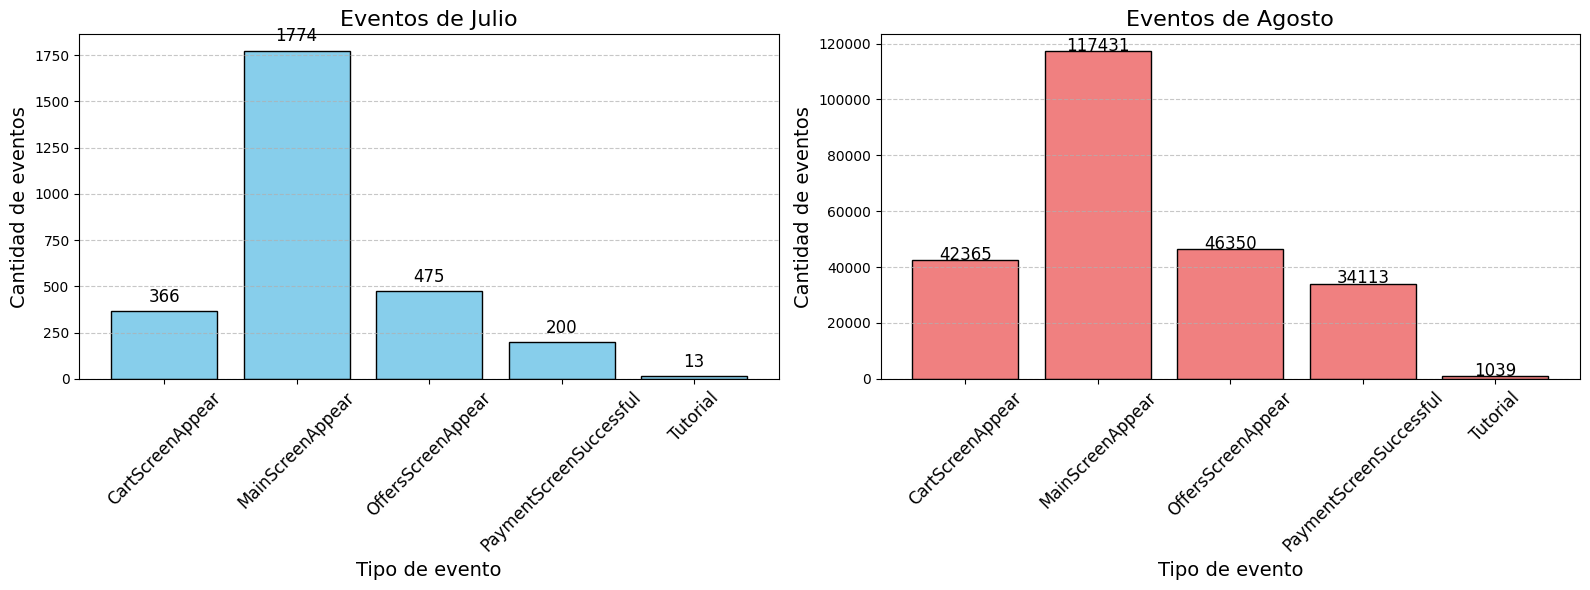

In [42]:

# Crear la figura con 2 subgráficas (una al lado de la otra)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras para los eventos de julio
ax[0].bar(july_events.index, july_events.values, color='skyblue', edgecolor='black')
ax[0].set_title('Eventos de Julio', fontsize=16)
ax[0].set_xlabel('Tipo de evento', fontsize=14)
ax[0].set_ylabel('Cantidad de eventos', fontsize=14)
ax[0].tick_params(axis='x', rotation=45, labelsize=12)

# Añadir líneas horizontales en el gráfico de julio
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Colocar los valores encima de cada barra en el gráfico de julio
for i, v in enumerate(july_events.values):
    ax[0].text(i, v + 50, str(v), ha='center', fontsize=12)

# Gráfico de barras para los eventos de agosto con un color más bonito (lightcoral)
ax[1].bar(august_events.index, august_events.values, color='lightcoral', edgecolor='black')
ax[1].set_title('Eventos de Agosto', fontsize=16)
ax[1].set_xlabel('Tipo de evento', fontsize=14)
ax[1].set_ylabel('Cantidad de eventos', fontsize=14)
ax[1].tick_params(axis='x', rotation=45, labelsize=12)

# Añadir líneas horizontales en el gráfico de agosto
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Colocar los valores encima de cada barra en el gráfico de agosto
for i, v in enumerate(august_events.values):
    ax[1].text(i, v + 50, str(v), ha='center', fontsize=12)

# Ajustar los márgenes para que las gráficas no se solapen
plt.tight_layout()

# Mostrar las gráficas
plt.show()

 #### Excluir los datos de july

In [43]:
# del total de eventos restar los datos del mes de julio

excluded_events  = total_events - total_july_events 

print(f'El total de eventos después de excluir datos de July es de: {excluded_events }')

El total de eventos después de excluir datos de July es de: 241298


In [44]:
# Eventos expluidos por tipo de eventos:

excluded_events_by_type = type_of_event - july_events
excluded_events_by_type

event_name
CartScreenAppear            42365
MainScreenAppear           117431
OffersScreenAppear          46350
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: date, dtype: int64

 #### Grafica para comparar los eventos totales y los excluidos

In [45]:
# concatenar los resultados para mostrar grafico de barras

combined_events = pd.concat([july_events, august_events, excluded_events_by_type], axis='columns')

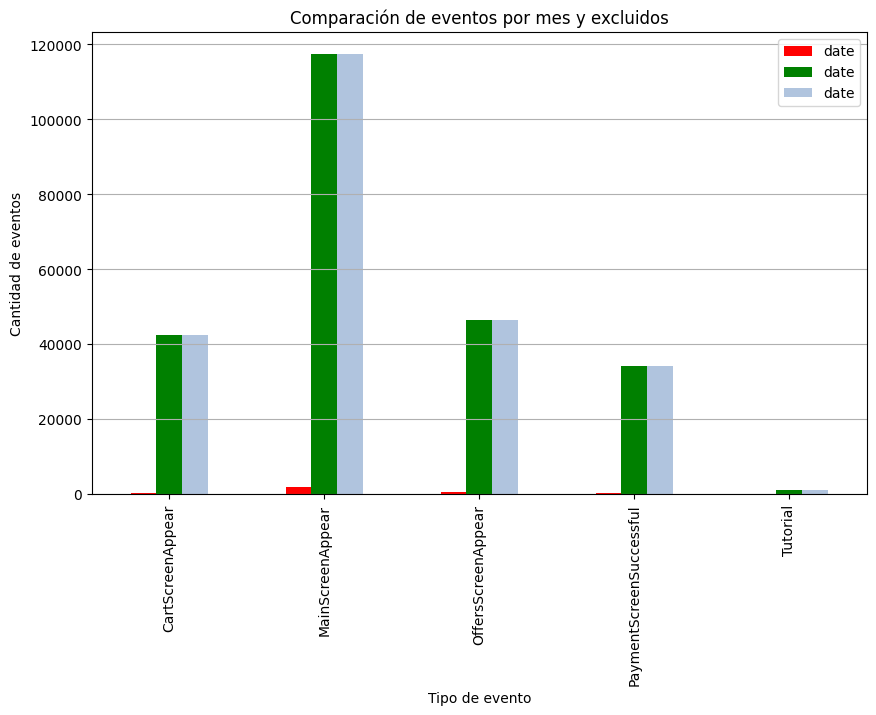

In [46]:
combined_events.plot(
    title="Comparación de eventos por mes y excluidos", 
    xlabel= 'Tipo de evento', 
    ylabel= 'Cantidad de eventos',
    kind='bar', 
    figsize=(10, 6),
    color=['red', 'green', 'lightsteelblue'] 
)


plt.grid(axis='y')
plt.show()

En la grafica podemos observar que la perdida de eventos es minima, ya que Agosto es el mes en donde los usuarios realizaron màs eventos

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo al calcular y comparar los eventos de julio y agosto. La visualización es clara y eficaz para mostrar la distribución de eventos por mes y el impacto de excluir los datos de julio. La interpretación es precisa, destacando correctamente que la pérdida de eventos es mínima y que agosto representa la mayor actividad. ¡Buen análisis!
</div>

 ### ¿Perdiste muchos usuarios al excluir los datos más antiguos?

 #### Usuarios por evento en July

In [47]:
# numero de usuarios unicos por evento en Julio

users_by_events_july = july_time.groupby('event_name')['device_id_hash'].nunique()
users_by_events_july

event_name
CartScreenAppear            283
MainScreenAppear           1028
OffersScreenAppear          323
PaymentScreenSuccessful     177
Tutorial                     11
Name: device_id_hash, dtype: int64

In [48]:
total_users_july = july_time['device_id_hash'].nunique()
print(f'El total de usuarios en el periodo de Julio son: {total_users_july} usuarios')

El total de usuarios en el periodo de Julio son: 1451 usuarios


 #### Usuarios por evento en August

In [49]:
# numero de usuarios unicos por evento en Agosto

users_by_events_august =  august_time.groupby('event_name')['device_id_hash'].nunique()
users_by_events_august

event_name
CartScreenAppear           3734
MainScreenAppear           7419
OffersScreenAppear         4593
PaymentScreenSuccessful    3539
Tutorial                    840
Name: device_id_hash, dtype: int64

In [50]:
total_users_august = august_time['device_id_hash'].nunique()
print(f'El total de usuarios en el periodo de Agosto son: {total_users_august} usuarios')

El total de usuarios en el periodo de Agosto son: 7534 usuarios


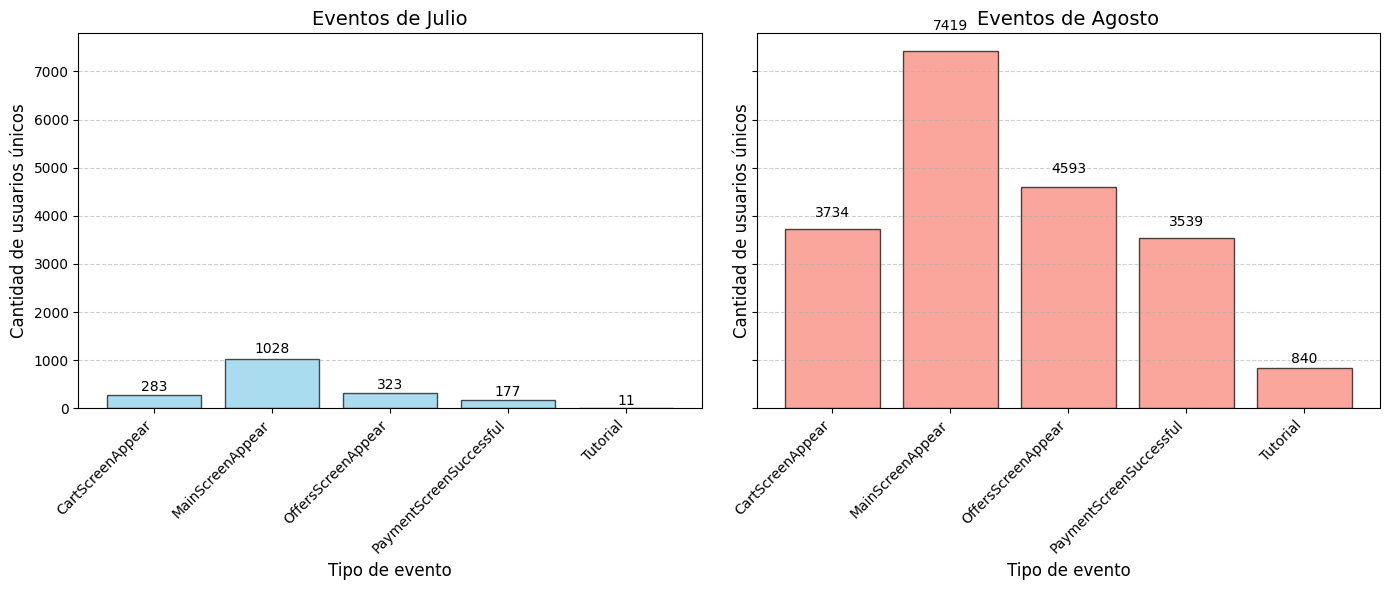

In [51]:
def plot_bars_with_labels(data, title, color, ax):
    events = data.index  # Nombres de los eventos
    values = data.values  # Cantidad de usuarios únicos

    bars = ax.bar(events, values, color=color, alpha=0.7, edgecolor='black')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Tipo de evento', fontsize=12)
    ax.set_ylabel('Cantidad de usuarios únicos', fontsize=12)
    ax.set_xticks(range(len(events)))
    ax.set_xticklabels(events, rotation=45, ha='right', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Etiquetas de cantidad sobre las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + height * 0.05,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Crear la figura y los ejes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráficos para julio y agosto
plot_bars_with_labels(users_by_events_july, 'Eventos de Julio', 'skyblue', axes[0])
plot_bars_with_labels(users_by_events_august, 'Eventos de Agosto', 'salmon', axes[1])

# Ajustar el diseño
plt.tight_layout()
plt.show()

En las graficas anteriores se puede observar que en Agosto fue el mes en donde los usuarios realizaron la mayor cantidad de eventos 

 #### Usuarios excluidos (sin July)

In [52]:
# total usuarios al excluir datos

excluded_users =  total_users - total_users_july

print(f'El total de usuarios despues de excluir los datos antiguos es de: {excluded_users}')

El total de usuarios despues de excluir los datos antiguos es de: 6100


In [53]:
# total usuarios por eventos despues de excluir datos

excluded_events_users = users_per_event - users_by_events_july
excluded_events_users

event_name
CartScreenAppear           3466
MainScreenAppear           6411
OffersScreenAppear         4290
PaymentScreenSuccessful    3370
Tutorial                    836
Name: device_id_hash, dtype: int64

 #### Usuarios combiandos ( usuarios por eventos de julio, agosto y los excluidos)

In [54]:
combined_users = pd.concat([users_by_events_july, users_by_events_august, excluded_events_users], axis='columns')
combined_users.columns=['July', 'August', 'Total users when excluding data']

In [55]:
combined_users

,July,August,Total users when excluding data
event_name,,,
CartScreenAppear,283,3734,3466
MainScreenAppear,1028,7419,6411
OffersScreenAppear,323,4593,4290
PaymentScreenSuccessful,177,3539,3370
Tutorial,11,840,836


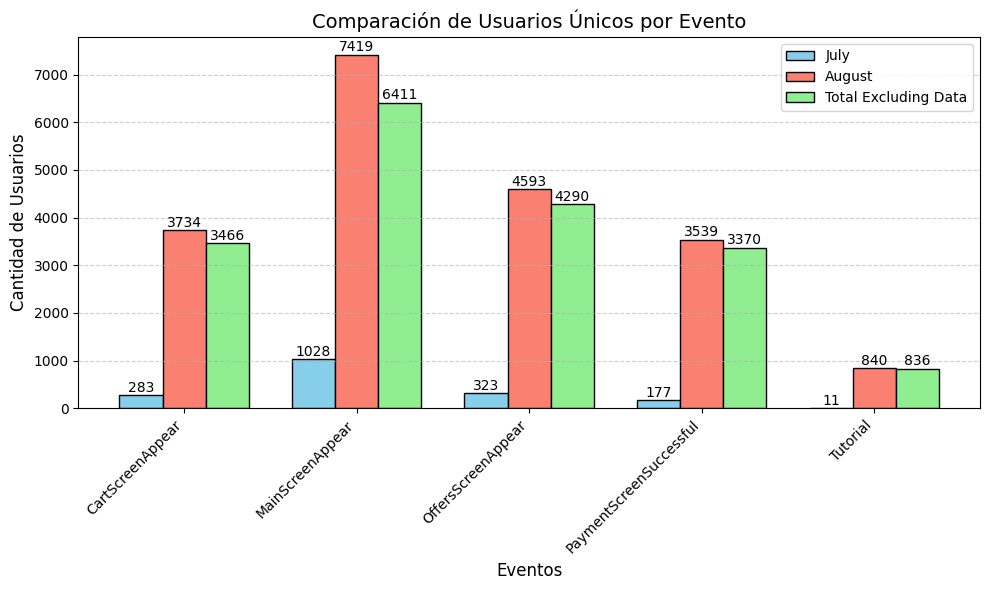

In [56]:
# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un índice para los eventos
x = range(len(combined_users))

# Ancho de cada barra
bar_width = 0.25

# Crear barras para cada categoría
bars1 = ax.bar([i - bar_width for i in x], combined_users['July'], width=bar_width, label='July', color='skyblue', edgecolor='black')
bars2 = ax.bar(x, combined_users['August'], width=bar_width, label='August', color='salmon', edgecolor='black')
bars3 = ax.bar([i + bar_width for i in x], combined_users['Total users when excluding data'], width=bar_width, label='Total Excluding Data', color='lightgreen', edgecolor='black')

# Etiquetas de eventos en el eje X
ax.set_xticks(x)
ax.set_xticklabels(combined_users.index, rotation=45, ha='right', fontsize=10)

# Agregar etiquetas a las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 5,
                f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Configuración del gráfico
ax.set_title('Comparación de Usuarios Únicos por Evento', fontsize=14)
ax.set_xlabel('Eventos', fontsize=12)
ax.set_ylabel('Cantidad de Usuarios', fontsize=12)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En a grafica se puede observar que el evento MainScreenAppear tiene la mayor cantidad de usuarios en todas las categorías. Esto sugiere que es una etapa clave en el embudo de ventas.  Ademàs en el grafico se logra observar que la cantidad de usuarios es mayor a los antes mencionados, sin embargo es necesario recordar que un usuario pudo haber realizado distintas acciones en los diferentes tipos de eventos. 

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente análisis al calcular y comparar el número de usuarios únicos por evento en julio y agosto, así como al excluir los datos de julio. Las gráficas son claras y bien etiquetadas, lo que facilita la interpretación. La interpretación también es correcta, destacando el evento "MainScreenAppear" como una etapa clave en el embudo de ventas. ¡Buen trabajo!
</div>

 ### Asegúrate de tener usuarios y usuarias de los tres grupos experimentales. 

**Grupo 246**

In [57]:
# filtrar los datos

data_246 = august_time.query('exp_id == 246')

# contar los usuarios unicos del grupo experimental
group_246 = data_246['device_id_hash'].nunique()

print(f'El total de usuarios únicos (casos de exito) para el grupo experimental 246 es de: {group_246}')

El total de usuarios únicos (casos de exito) para el grupo experimental 246 es de: 2484


**Grupo 247**

In [58]:
# filtrar los datos

data_247 = august_time.query('exp_id == 247')

# contar los usuarios unicos del grupo experimental
group_247 = data_247['device_id_hash'].nunique()

print(f'El total de usuarios únicos (casos de exito) para el grupo experimental 247 es de: {group_247}')

El total de usuarios únicos (casos de exito) para el grupo experimental 247 es de: 2513


**Grupo 248**

In [59]:
# filtrar los datos

data_248 = august_time.query('exp_id == 248')

# contar los usuarios unicos del grupo experimental
group_248 = data_248['device_id_hash'].nunique()

print(f'El total de usuarios únicos (casos de exito) para el grupo experimental 248 es de: {group_248}')

El total de usuarios únicos (casos de exito) para el grupo experimental 248 es de: 2537


Se puede analizar con estos 3 resultados que los grupos 246, 247 y 248 tienen valores similares

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen trabajo al filtrar y contar los usuarios únicos por grupo experimental. Los cálculos son correctos y la comparación entre los tres grupos es clara. La interpretación también es adecuada, observando que los grupos tienen valores similares. ¡Buen análisis!
</div>

## Paso 4. Estudiar el Embudo de Eventos

In [60]:
# encontrar los eventos por usuario

event_count = august_time.groupby('event_name')['device_id_hash'].count().reset_index()
# renombrar columnas
event_count.columns=['Stage', 'Quantity']

In [61]:
# ordenar los eventos por cantidad 
event_count.sort_values(by='Quantity', ascending=False, inplace=True)
event_count

,Stage,Quantity
1,MainScreenAppear,117431
2,OffersScreenAppear,46350
0,CartScreenAppear,42365
3,PaymentScreenSuccessful,34113
4,Tutorial,1039


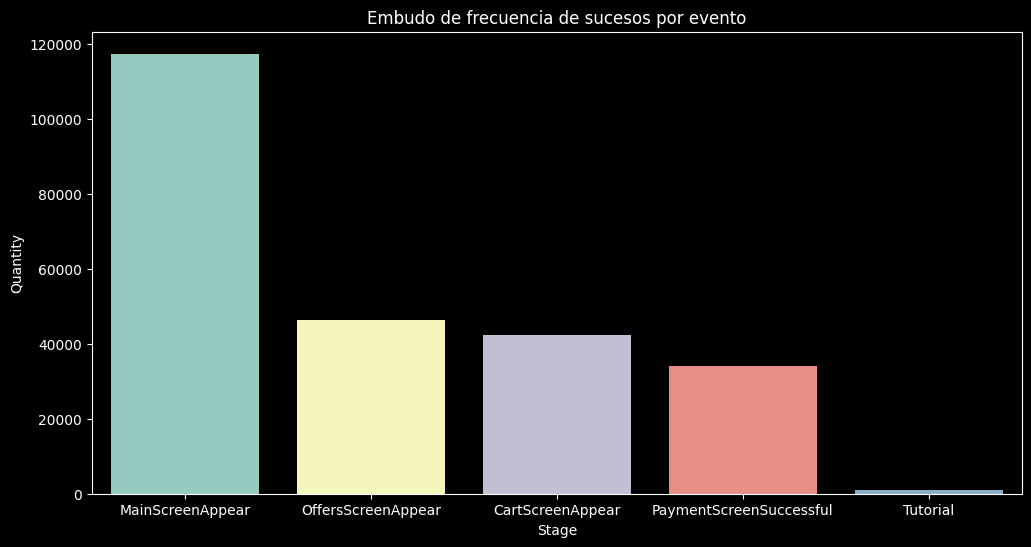

In [62]:
plt.style.use("dark_background")
plt.figure(figsize=(12,6))

sns.barplot(
    x='Stage', 
    y='Quantity', 
    data=event_count)

plt.title('Embudo de frecuencia de sucesos por evento')
plt.show()

Para poder identificar la frecuencia de eventos fue necesario construir un embudo, en el cual se observa que las fases tienen un orden comenzando por Main Screen, siguiendo con Offer Screen, Cart Screen y Payment Screen, lo cual al compararlo con otros sitios web, tienen un orden común (sucede en cualquier otro sitio). Sin embargo, la parte final del embudo, es decir, el evento Tutorial es el que menos frecuencia tiene lo que podria indicar que muchos usuarios omiten esta fase o la desconocen.


### Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias.

In [63]:
# encontrar los eventos por usuario unico 

user_uniq = august_time.groupby('event_name').agg({'device_id_hash':'nunique'})
print(user_uniq.sort_values(by='device_id_hash', ascending=False))

                         device_id_hash
event_name                             
MainScreenAppear                   7419
OffersScreenAppear                 4593
CartScreenAppear                   3734
PaymentScreenSuccessful            3539
Tutorial                            840


### Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.

In [64]:
# calcular las proporciones 

proportions = user_uniq / total_users_august * 100
print(proportions.sort_values(by='device_id_hash', ascending=False).round(2))

                         device_id_hash
event_name                             
MainScreenAppear                  98.47
OffersScreenAppear                60.96
CartScreenAppear                  49.56
PaymentScreenSuccessful           46.97
Tutorial                          11.15


Al calcular las proporciones se observa que el 98.47% de usuarios entrar a la pagina principal, después un 60.96% entrar a la pagina de ofertas, seguido de un 49.56% de usuarios que entran a la pagina de carrito y finalmente el 46.97% completa el pago, esto hay que recordar es de usuarios que al menos una vez han realizado estas acciones. Por otra parte la fase de Tutorial vuelve a presentar una proporcion baja de usuarios, lo cualñ puede ser natural por el tipo de producto que venden

### ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia?

In [65]:
# agrupar por usuario y evento para encontrar el primer evento que occurrio

event_order = august_time.groupby(['device_id_hash', 'event_name'])['date_hour'].min().reset_index()

In [66]:
# crear columna nueva donde se almacenen el orden de los eventos

event_order['event_order'] = event_order.groupby('device_id_hash')['date_hour'].rank(method='first')

In [67]:
# ordenar por usuario y el orden en que sucedieron los eventos 
event_order_sorted = event_order.sort_values(by=['device_id_hash', 'event_order'])

In [68]:

event_order_sorted.head(20)

,device_id_hash,event_name,date_hour,event_order
0,6888746892508752,MainScreenAppear,2019-08-06 14:06:34,1.0
2,6909561520679493,MainScreenAppear,2019-08-06 18:52:54,1.0
1,6909561520679493,CartScreenAppear,2019-08-06 18:52:58,2.0
4,6909561520679493,PaymentScreenSuccessful,2019-08-06 18:52:58,3.0
3,6909561520679493,OffersScreenAppear,2019-08-06 18:53:04,4.0
6,6922444491712477,MainScreenAppear,2019-08-04 14:19:33,1.0
5,6922444491712477,CartScreenAppear,2019-08-04 14:19:40,2.0
8,6922444491712477,PaymentScreenSuccessful,2019-08-04 14:19:40,3.0
7,6922444491712477,OffersScreenAppear,2019-08-04 14:19:46,4.0
9,7435777799948366,MainScreenAppear,2019-08-05 08:06:34,1.0


En la tabla anterior se puede comprender que no todos los usuarios cumplen las mismas secuencia de compra. Por ejemplo, algunos entran a Main Screen y a Offer Screen, pero ahi termina su secuencia. hay otros usuarios que incluso empiezan su secuencia en Cart Screen y concluyen con Payment Screen.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo al construir y analizar el embudo de eventos. El análisis de la frecuencia de los eventos y las proporciones de usuarios es claro y útil para entender el comportamiento de los usuarios en el sitio. La interpretación es acertada, especialmente en relación con el evento "Tutorial", que muestra una baja participación, lo cual puede ser natural según el tipo de producto. ¡Buen análisis y visualización!
</div>

### Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente.

In [69]:
# Crear una tabla dinámica para calcular usuarios únicos por evento
user_pivot = august_time.pivot_table(
    index='device_id_hash',
    columns='event_name',
    values='date_hour',
    aggfunc='min'
)

In [70]:
user_pivot.head(20)

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
device_id_hash,,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT
6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,NaT
7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,NaT
8486814028069281,2019-08-05 04:49:18,2019-08-05 04:52:40,2019-08-05 04:49:13,NaT,NaT
8740973466195562,NaT,2019-08-02 09:16:48,2019-08-02 09:43:59,NaT,NaT
9841258664663090,2019-08-03 10:52:15,2019-08-03 10:47:59,2019-08-03 10:49:42,2019-08-03 17:57:27,2019-08-03 10:47:28
12692216027168046,NaT,2019-08-02 16:28:49,2019-08-05 04:06:02,NaT,NaT


#### Vamos a   cómo los usuarios progresan a través del embudo de conversiòn. Este método considera el orden cronológico en como los eventos ocurren para cada usuario

In [71]:
# declarar los pasos del Embudo

step_1 = ~user_pivot['MainScreenAppear'].isna()
step_2 = step_1 & (user_pivot['OffersScreenAppear'] > user_pivot['MainScreenAppear'])
step_3 = step_2 & (user_pivot['CartScreenAppear'] > user_pivot['OffersScreenAppear'])
step_4 = step_3 & (user_pivot['PaymentScreenSuccessful'] > user_pivot['CartScreenAppear'])
step_5 = step_4 & (user_pivot['Tutorial'] > user_pivot['PaymentScreenSuccessful'])

In [72]:
# crear variables con los pasos de la hora de su primer visita y los que realizaron la accion
n_mainScreen = user_pivot[step_1].shape[0]
n_offers = user_pivot[step_2].shape[0]
n_cart = user_pivot[step_3].shape[0]
n_payment = user_pivot[step_4].shape[0]
n_tutorial = user_pivot[step_5].shape[0]

In [73]:
print('MainScreenAppear /Visitantes:', n_mainScreen)
print('OffersScreenAppear / Vio pagina de oferta:', n_offers)
print('CartScreenAppear /Se agregó un producto al carrito:', n_cart)
print('PaymentScreenSuccessful / Pagado:', n_payment)
print('Vio Tutorial: ', n_tutorial)

MainScreenAppear /Visitantes: 7419
OffersScreenAppear / Vio pagina de oferta: 4201
CartScreenAppear /Se agregó un producto al carrito: 1767
PaymentScreenSuccessful / Pagado: 454
Vio Tutorial:  1


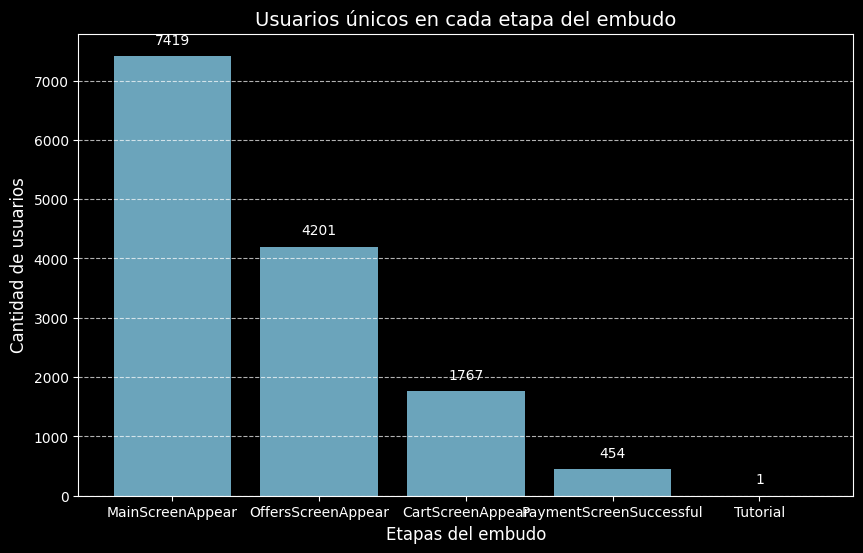

In [74]:
# Datos del embudo (sustituir con tus datos)
steps = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful', 'Tutorial']
counts = [n_mainScreen, n_offers, n_cart, n_payment, n_tutorial]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(steps, counts, color='skyblue', alpha=0.8)

# Añadir etiquetas de los valores
for i, count in enumerate(counts):
    plt.text(i, count + 0.02 * max(counts), str(count), ha='center', va='bottom')

# Personalizar el gráfico
plt.title('Usuarios únicos en cada etapa del embudo', fontsize=14)
plt.xlabel('Etapas del embudo', fontsize=12)
plt.ylabel('Cantidad de usuarios', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Al realizar el embudo de secuencias de usuarios que pasan a otra fase se obtuvo que de un total de 7419 usuarios que visitaron Main Screen la siguiente etapa solo consiguio mantener a 4201 usuarios, despues los usuarios que llegan a Cart Screen son 1767 y por ultimo, solo 454 usuarios pagan la orden. Esto recordemos es de los usuarios que siguen con una secuencia esperada, es decir, comenzando en la etapa 1 y terminando en la etapa 4.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy buen trabajo al construir el embudo de conversión y analizar el progreso de los usuarios en cada etapa. El cálculo de la proporción de usuarios que pasan de una etapa a la siguiente es muy claro, y la visualización del embudo es efectiva. La interpretación de los resultados también es precisa, destacando correctamente la disminución en el número de usuarios a medida que avanzan por las etapas. ¡Excelente análisis y presentación!
</div>

In [75]:
# Calcular tasas de conversión
conversion_rates = [
    n_offers / n_mainScreen,
    n_cart / n_offers,
    n_payment / n_cart,
    n_tutorial / n_payment
]

conversion_rates

[0.5662488205957676,
 0.42061413949059745,
 0.2569326542161856,
 0.0022026431718061676]

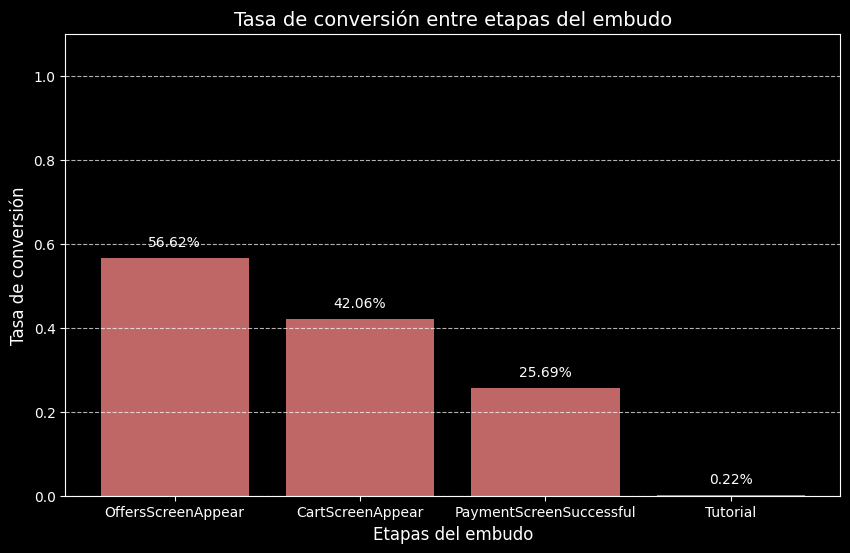

In [76]:

# Gráfico de barras para las tasas de conversión
plt.figure(figsize=(10, 6))
plt.bar(steps[1:], conversion_rates, color='lightcoral', alpha=0.8)

# Añadir etiquetas de las tasas
for i, rate in enumerate(conversion_rates):
    plt.text(i, rate + 0.02, f'{rate:.2%}', ha='center', va='bottom')

# Personalizar el gráfico
plt.title('Tasa de conversión entre etapas del embudo', fontsize=14)
plt.xlabel('Etapas del embudo', fontsize=12)
plt.ylabel('Tasa de conversión', fontsize=12)
plt.ylim(0, 1.1)  # Limitar al rango de porcentajes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Las tasas de conversión calculadas representan la proporción de usuarios que avanzan de una etapa del embudo a la siguiente. En el grafico anterior se puede deducir que:De los usuarios que visitaron la MainScreenAppear, el 56.62% avanzó a la etapa OffersScreenAppear (es decir, vieron las ofertas).
Esto indica que un poco más de la mitad de los usuarios están interesados en explorar las ofertas después de la pantalla principal.


De los usuarios que llegaron a OffersScreenAppear, el 42.06% agregó un producto al carrito (CartScreenAppear).
Aquí hay una caída significativa, lo cual es común en muchos embudos de ventas, ya que no todos los que ven las ofertas están interesados en realizar compras.

De los usuarios que llegaron a CartScreenAppear, solo el 25.69% completó el pago (PaymentScreenSuccessful).
Esto refleja que una buena parte de los usuarios abandonan el carrito antes de pagar, lo cual es un área crítica para investigar y optimizar.

De los usuarios que completaron el pago (PaymentScreenSuccessful), solo el 0.22% vio el tutorial (Tutorial).
Esto podría ser por dos razones:
El tutorial no es relevante para la mayoría de los usuarios después de realizar una compra.
Podría tratarse de un error en el flujo del embudo o un problema de diseño que limita el acceso al tutorial.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo calculando y visualizando las tasas de conversión entre las etapas del embudo. Las tasas están claramente presentadas y la interpretación de los resultados es precisa. Identificas correctamente las áreas críticas, como la caída en la conversión entre "CartScreenAppear" y "PaymentScreenSuccessful". Además, el análisis de la baja tasa de usuarios que ven el tutorial es útil y puede indicar áreas de mejora. ¡Buen análisis y presentación de los datos!
</div>

### ¿En qué etapa pierdes más usuarios y usuarias?

**Vamos a crear un nuevo Dataframe para obtener la Cantidad de usuarios por cada evento**


In [77]:
# crear diccionario con los datos obtenidos
embudo_usuarios = {
    'MainScreenAppear' : n_mainScreen,
    'OffersScreenAppear' : n_offers,
    'CartScreenAppear' : n_cart,
    'PaymentScreenSuccessful' : n_payment,
    'Tutorial' : n_tutorial
}

In [78]:
# crear DF con los datos del embudo
df_embudo = pd.DataFrame(list(embudo_usuarios.items()))

# renombrar columnas
df_embudo.columns=['event_name', 'usuarios_despues_embudo']

In [79]:
# resetear index de usuarios unicos iniciales y renombrar columnas

user_unico = user_uniq.sort_values(by='device_id_hash', ascending=False).reset_index()
user_unico.columns= ['event_name', 'usuarios_iniciales']

In [80]:
# combinar los DF 
df_comparativo = user_unico.merge(df_embudo, on='event_name')

In [81]:
# calcular la diferencia entre los usuarios inciales y los que restan despues del embudo
df_comparativo['usuarios_perdidos'] = df_comparativo['usuarios_iniciales'] - df_comparativo['usuarios_despues_embudo']

In [82]:
df_comparativo

,event_name,usuarios_iniciales,usuarios_despues_embudo,usuarios_perdidos
0,MainScreenAppear,7419,7419,0
1,OffersScreenAppear,4593,4201,392
2,CartScreenAppear,3734,1767,1967
3,PaymentScreenSuccessful,3539,454,3085
4,Tutorial,840,1,839


En el grafico anterior, podemos observar la cantidad exacta de usuarios que no avanzaron a la siguiente etapa, es decir usuarios que se pierden. Ademàs, se puede identificar que se pierden màs usuarios de la etapa Cart Screen a Payment Screen con un total de 3085 usuarios, es decir hay gran cantidad de clientes que no estan comprando el producto

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente análisis para identificar en qué etapa se pierden más usuarios. El uso del gráfico de barras es efectivo para visualizar la cantidad de usuarios iniciales y los que quedan después del embudo. La interpretación es precisa, destacando correctamente la gran pérdida de usuarios entre "CartScreenAppear" y "PaymentScreenSuccessful". Este análisis ayuda a identificar áreas críticas para mejorar la conversión. ¡Bien hecho!
</div>

### ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?

In [84]:
# crear columna con porcentajes de usuarios que concluyen la compra
df_comparativo['conversion_siguiente_etapa'] = (
    df_comparativo['usuarios_despues_embudo'] / df_comparativo['usuarios_iniciales']) * 100

In [85]:
# redondear a 2 digitos
df_comparativo['conversion_siguiente_etapa'] = df_comparativo['conversion_siguiente_etapa'].round(2)

In [86]:
df_comparativo

,event_name,usuarios_iniciales,usuarios_despues_embudo,usuarios_perdidos,conversion_siguiente_etapa
0,MainScreenAppear,7419,7419,0,100.00
1,OffersScreenAppear,4593,4201,392,91.47
2,CartScreenAppear,3734,1767,1967,47.32
3,PaymentScreenSuccessful,3539,454,3085,12.83
4,Tutorial,840,1,839,0.12


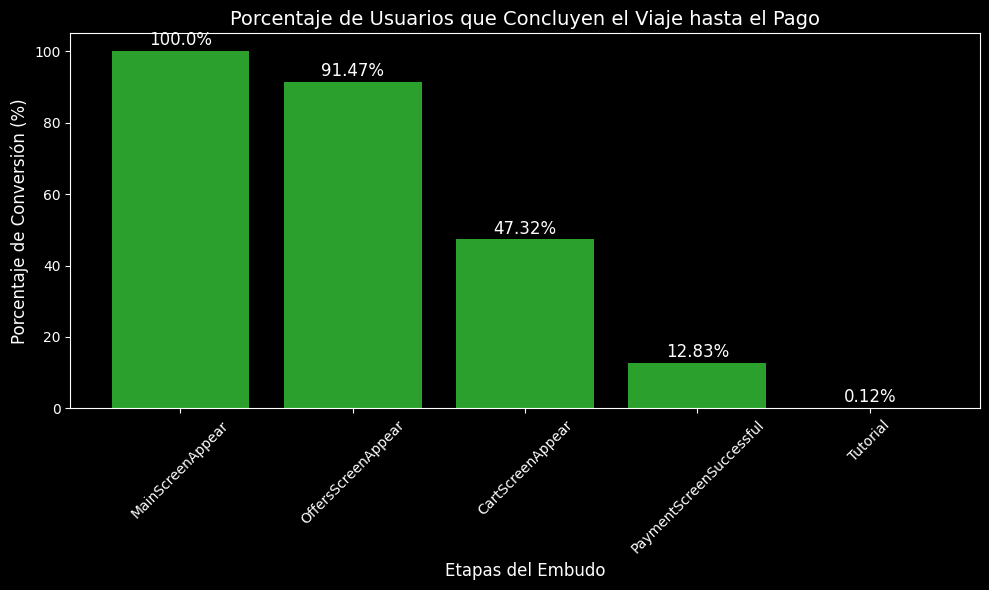

In [87]:
# Graficar los porcentajes de conversión
plt.figure(figsize=(10, 6))

# Colores para las barras
plt.bar(df_comparativo['event_name'], df_comparativo['conversion_siguiente_etapa'], color='#2ca02c')

# Etiquetas con el porcentaje en cada barra
for i, value in enumerate(df_comparativo['conversion_siguiente_etapa']):
    plt.text(i, value + 0.5, f'{value}%', ha='center', va='bottom', fontsize=12, color='white')

# Personalizar el gráfico
plt.title('Porcentaje de Usuarios que Concluyen el Viaje hasta el Pago', fontsize=14)
plt.xlabel('Etapas del Embudo', fontsize=12)
plt.ylabel('Porcentaje de Conversión (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Al analizar el porcentaje de usuarios que realizan todo el viaje desde su primer evento hasta el pago solo alcanzamos un 12.83% del total de usuarios, lo cual es un valor muy bajo. Ademas, hay una gran diferencia entre los usuarios que estan en el evento de la Oferta y los que llegan al carrito de compras

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen trabajo al calcular y visualizar el porcentaje de usuarios que completan el viaje hasta el pago. La gráfica es clara y muestra de manera efectiva la tasa de conversión en cada etapa del embudo. La interpretación es correcta, destacando la baja tasa de conversión y la diferencia significativa entre los usuarios que ven las ofertas y los que agregan productos al carrito. ¡Buen análisis!
</div>

## Paso 5. Estudiar los resultados del experimento

### ¿Cuántos usuarios y usuarias hay en cada grupo?

**Grupo Control 246**

In [88]:
# Calcular el total de usuarios para el periodo de agosto del grupo control 246
total_246 = data_246.shape[0]

print('el total de usuarios para el grupo 246 es de:', total_246)

el total de usuarios para el grupo 246 es de: 79425


In [89]:
# mostrar los casos de exito del grupo 246
print(f'El total de usuarios únicos (casos de exito) para el grupo experimental 246 es de: {group_246}')

El total de usuarios únicos (casos de exito) para el grupo experimental 246 es de: 2484


**Grupo Control 247**

In [90]:
# Calcular el total de usuarios para el periodo de agosto del grupo control 247

total_247 = data_247.shape[0]
print('el total de usuarios para el grupo 247 es de:', total_247)

el total de usuarios para el grupo 247 es de: 77147


In [91]:
# mostrar los casos de exito del grupo 247

print(f'El total de usuarios únicos (casos de exito) para el grupo experimental 246 es de: {group_247}')

El total de usuarios únicos (casos de exito) para el grupo experimental 246 es de: 2513


**Grupo de prueba 248**

In [92]:
# Calcular el total de usuarios para el periodo de agosto del grupo experimental 248
total_248 = data_248.shape[0]
print('El total de usuarios para el grupo 248 es de:', total_248)

El total de usuarios para el grupo 248 es de: 84726


In [93]:
# mostrar los casos de exito del grupo 248
print(f'El total de usuarios únicos (casos de exito) para el grupo experimental 248 es de: {group_248}')

El total de usuarios únicos (casos de exito) para el grupo experimental 248 es de: 2537


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen trabajo al calcular y mostrar el número total de usuarios y usuarios únicos en cada grupo experimental. Los cálculos son claros y bien presentados. Además, la comparación entre los diferentes grupos es útil para evaluar la distribución de usuarios en cada grupo de control y experimental. ¡Bien hecho!
</div>

### Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

Hipotesis nula: No Existe diferencia estadísticamente significativa entre las muestras 246 y 247.


Hipotesis alternativa: Si hay cambio estadisticamente entre las muestras 246 y 247

#### prueba de proporciones: PRUEBA Z

In [94]:
# Cálculo con una prueba de proporciones: PRUEBA Z

from statsmodels.stats.proportion import proportions_ztest

# Datos
success_246 = 2484
total_246 = 79425
success_247 = 2513
total_247 = 77147

In [95]:
# Valores para la prueba Z
counts = [success_246, success_247]  # Casos de éxito
nobs = [total_246, total_247]  # Tamaño de cada grupo

In [96]:
# Prueba Z para proporciones
stat, p_value = proportions_ztest(counts, nobs)

In [97]:
# Mostrar los resultados
print(f'Estadístico Z: {stat:.2f}')
print(f'P-valor: {p_value:.5f}')

Estadístico Z: -1.46
P-valor: 0.14363


In [98]:
# Interpretación
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre los grupos.")
else:
    print("No podemos rechazar la hipótesis nula: no hay evidencia suficiente para decir que los grupos son diferentes.")

No podemos rechazar la hipótesis nula: no hay evidencia suficiente para decir que los grupos son diferentes.


El estadistico Z indica la magnitud de la diferencia y el P-Valor es mayor a 0.05, por lo tanto no hay evidencia suficiente para decir que los grupos son diferentes

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo al realizar la prueba Z para comparar las muestras de los grupos 246 y 247. La interpretación del estadístico Z y del p-valor es correcta, y has concluido adecuadamente que no hay evidencia suficiente para rechazar la hipótesis nula. Esto es un análisis sólido de la diferencia estadística entre los grupos. ¡Buen trabajo!
</div>

### Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?


**Se crea una funcion para seleccionar el Evento más popular**

In [99]:
def proporcion_eventos_por_grupo(df, grupo_id):
    
    #filtrar los datos por grupo
    df_grupo = df[df['exp_id'] == grupo_id]
    
    # obtener el total de usuarios unicos
    total_usuarios_unicos = df_grupo['device_id_hash'].nunique()
    
    # agrupar por evento y contar los usuarios unicos en cada evento
    evento_count = df_grupo.groupby('event_name')['device_id_hash'].nunique().sort_values(ascending=False)
    
    print(f"\nProporciones para el grupo {grupo_id}\n")
    
    # ciclo for para calcular y mostrar la proporcion de cada evento
    for evento, usuarios_unicos in evento_count.items():
        proporcion = (usuarios_unicos / total_usuarios_unicos) * 100
    
        print(f"Evento: {evento} - Usuarios únicos {usuarios_unicos} (proporcion {proporcion:.2f}%)")

In [100]:
proporcion_eventos_por_grupo(august_time, 246)


Proporciones para el grupo 246

Evento: MainScreenAppear - Usuarios únicos 2450 (proporcion 98.63%)
Evento: OffersScreenAppear - Usuarios únicos 1542 (proporcion 62.08%)
Evento: CartScreenAppear - Usuarios únicos 1266 (proporcion 50.97%)
Evento: PaymentScreenSuccessful - Usuarios únicos 1200 (proporcion 48.31%)
Evento: Tutorial - Usuarios únicos 278 (proporcion 11.19%)


In [101]:
proporcion_eventos_por_grupo(august_time, 247)


Proporciones para el grupo 247

Evento: MainScreenAppear - Usuarios únicos 2476 (proporcion 98.53%)
Evento: OffersScreenAppear - Usuarios únicos 1520 (proporcion 60.49%)
Evento: CartScreenAppear - Usuarios únicos 1238 (proporcion 49.26%)
Evento: PaymentScreenSuccessful - Usuarios únicos 1158 (proporcion 46.08%)
Evento: Tutorial - Usuarios únicos 283 (proporcion 11.26%)


Esta funcion ayuda a calcular la proporcion de cada uno de los grupos control en donde se puede visualizar la cantidad de usuarios unicos y que proporcion tienen en cada tipo de eventos

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente trabajo al crear una función para calcular la proporción de usuarios que realizaron cada evento por grupo. Esta función es eficiente y ahorra tiempo al analizar todos los grupos. La visualización de las proporciones para cada evento es clara y útil para comparar el comportamiento de los usuarios en los diferentes grupos de control. ¡Buen enfoque y organización del código!
</div>

#### Comprueba si la diferencia entre los grupos es estadísticamente significativa.

In [102]:
def comparar_proporciones(df, evento):
    # filtrar usuarios que realizaron el evento para cada grupo 
    grupo_246 = df[(df['exp_id'] == 246) & (df['event_name'] == evento)]['device_id_hash'].nunique()
    grupo_247 = df[(df['exp_id'] == 247) & (df['event_name'] == evento)]['device_id_hash'].nunique()    
    
    # obtener usuarios unicos por grupo 
    total_246 = df[df['exp_id'] == 246 ]['device_id_hash'].nunique()
    total_247 = df[df['exp_id'] == 247 ]['device_id_hash'].nunique()
    
    # numero de exito y tamaño de la muestra 
    exitos = np.array([grupo_246, grupo_247])
    prueba = np.array([total_246, total_247])
    
    # aplicar la prueba de dos proporciones
    stat, p_value = proportions_ztest(exitos, prueba)
    
    # Resultados
    print(f"\nComparación para el evento: {evento}")
    print(f"Grupo 246: Usuarios que realizan evento: {grupo_246} / Usuarios unicos: {total_246} / proporcion:({grupo_246 / total_246 * 100:.2f}%)")
    print(f"Grupo 247: Usuarios que realizan evento: {grupo_247} / Usuarios unicos: {total_247} / proporcion:({grupo_247 / total_247 * 100:.2f}%)")
    print(f"p-value: {p_value}")
    
    if p_value < 0.05:
        print("Diferencia estadísticamente significativa entre los grupos.")
    else:
        print("No hay diferencia estadísticamente significativa entre los grupos.")

**MainScreenAppear**

In [103]:
comparar_proporciones(august_time,'MainScreenAppear')


Comparación para el evento: MainScreenAppear
Grupo 246: Usuarios que realizan evento: 2450 / Usuarios unicos: 2484 / proporcion:(98.63%)
Grupo 247: Usuarios que realizan evento: 2476 / Usuarios unicos: 2513 / proporcion:(98.53%)
p-value: 0.7570597232046099
No hay diferencia estadísticamente significativa entre los grupos.


**OffersScreenAppear**

In [104]:
comparar_proporciones(august_time,'OffersScreenAppear')


Comparación para el evento: OffersScreenAppear
Grupo 246: Usuarios que realizan evento: 1542 / Usuarios unicos: 2484 / proporcion:(62.08%)
Grupo 247: Usuarios que realizan evento: 1520 / Usuarios unicos: 2513 / proporcion:(60.49%)
p-value: 0.2480954578522181
No hay diferencia estadísticamente significativa entre los grupos.


**CartScreenAppear**

In [105]:
comparar_proporciones(august_time,'CartScreenAppear')


Comparación para el evento: CartScreenAppear
Grupo 246: Usuarios que realizan evento: 1266 / Usuarios unicos: 2484 / proporcion:(50.97%)
Grupo 247: Usuarios que realizan evento: 1238 / Usuarios unicos: 2513 / proporcion:(49.26%)
p-value: 0.22883372237997213
No hay diferencia estadísticamente significativa entre los grupos.


**PaymentScreenSuccessful**

In [106]:
comparar_proporciones(august_time,'PaymentScreenSuccessful')


Comparación para el evento: PaymentScreenSuccessful
Grupo 246: Usuarios que realizan evento: 1200 / Usuarios unicos: 2484 / proporcion:(48.31%)
Grupo 247: Usuarios que realizan evento: 1158 / Usuarios unicos: 2513 / proporcion:(46.08%)
p-value: 0.11456679313141847
No hay diferencia estadísticamente significativa entre los grupos.


**Tutorial**

In [107]:
comparar_proporciones(august_time,'Tutorial')


Comparación para el evento: Tutorial
Grupo 246: Usuarios que realizan evento: 278 / Usuarios unicos: 2484 / proporcion:(11.19%)
Grupo 247: Usuarios que realizan evento: 283 / Usuarios unicos: 2513 / proporcion:(11.26%)
p-value: 0.9376996189257114
No hay diferencia estadísticamente significativa entre los grupos.


La funcion que se creo con el nombre: **comparar_proporciones** nos permite comparar cada uno de los eventos por Grupo Control, calculando la significancia de cada uno de ellos. Esto dio como resultado que en Ninguno  de los dos Grupos hay una diferencia significativa al comparar los distintos tipos de Eventos.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy bien al crear la función comparar_proporciones para comparar la significancia estadística de los eventos entre los grupos. La implementación es clara y efectiva. La interpretación de los resultados es correcta, destacando que no hay diferencias significativas entre los grupos. ¡Buen trabajo!
</div>

#### ¿Puedes confirmar que los grupos se dividieron correctamente? : 'Prueba U de  Mann-Whitney' (evalúa si dos muestras provienen de la misma distribución)

**Hipótesis nula (H₀):** Los grupos 246 y 247 tienen distribuciones similares.

**Hipótesis alternativa (H₁):** Los grupos 246 y 247 tienen distribuciones diferentes.

In [108]:
# crear arrays con la informacion de usuarios unicos que realizaron acciones 
#Cada número en el array corresponde al conteo de usuarios únicos por tipo de evento

array_246 = [2450, 1542, 1266, 1200, 278]

array_247 = [2476, 1520, 1238, 1158, 283]

In [109]:
# aplicar prueba U de Mann-Whitney para comprobar que los grupos se dividieron correctamente

resultados_control = stats.mannwhitneyu(array_246, array_247)

print('p-value', resultados_control.pvalue)

if(resultados_control.pvalue < alpha):
    print('Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de los grupos')
else:
    print('No se puede rechazar la hipótesis nula: no existen diferencias significativas sobre la distribución de los grupos')

p-value 1.0
No se puede rechazar la hipótesis nula: no existen diferencias significativas sobre la distribución de los grupos


******En conlusión No se detectaron que existan diferencias Significativas entre los grupos 246 y 247. Se puede confirmar que los grupos se dividieron correctamente, ya que no hay evidencia estadística de que sus distribuciones difieran. Esto es crucial para garantizar la validez del experimento, ya que cualquier diferencia significativa entre los grupos de control podría sesgar los resultados del análisis.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy bien al crear la función comparar_proporciones para comparar la significancia estadística de los eventos entre los grupos. La implementación es clara y efectiva. La interpretación de los resultados es correcta, destacando que no hay diferencias significativas entre los grupos. ¡Buen trabajo!
</div>


### Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?


In [110]:
proporcion_eventos_por_grupo(august_time, 248)


Proporciones para el grupo 248

Evento: MainScreenAppear - Usuarios únicos 2493 (proporcion 98.27%)
Evento: OffersScreenAppear - Usuarios únicos 1531 (proporcion 60.35%)
Evento: CartScreenAppear - Usuarios únicos 1230 (proporcion 48.48%)
Evento: PaymentScreenSuccessful - Usuarios únicos 1181 (proporcion 46.55%)
Evento: Tutorial - Usuarios únicos 279 (proporcion 11.00%)


**Prueba U de Mann-Whitney** para el grupo 248 con respecto a 246

In [111]:
# crear array con los datos del grupo experimental 
array_248 = [ 2493, 1531, 1230, 1181, 279]

# aplicar prueba U de mann para comprobar que los grupos se dividieron correctamente
resultados_exp246_aislado = stats.mannwhitneyu(array_248, array_246)

print('p-value', resultados_exp246_aislado.pvalue)

if(resultados_exp246_aislado.pvalue < alpha):
    print('Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de los grupos')
else:
    print('No se puede rechazar la hipótesis nula: no existen diferencias sobre la distribución de los grupos')

p-value 1.0
No se puede rechazar la hipótesis nula: no existen diferencias sobre la distribución de los grupos


**Prueba U de Mann-Whitney** para el grupo 248 con respecto a 247

In [112]:
# aplicar prueba U de mann para comprobar que los grupos se dividieron correctamente
resultados_exp247_aislado = stats.mannwhitneyu(array_248, array_247)

print('p-value', resultados_exp247_aislado.pvalue)

if(resultados_exp247_aislado.pvalue < alpha):
    print('Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de los grupos')
else:
    print('No se puede rechazar la hipótesis nula: no existen diferencias sobre la distribución de los grupos')

p-value 1.0
No se puede rechazar la hipótesis nula: no existen diferencias sobre la distribución de los grupos


Al comparar los grupos control con el experimental aisladamente, se aplico nuevamente una prueba U de Mann y se encontro que en ningun caso existe una diferencia en las distribuciones, por lo cual No existen diferencias significativas sobre la Distribución de los Grupos

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen trabajo al aplicar la prueba U de Mann-Whitney para comparar el grupo experimental con los grupos de control. La interpretación es correcta, destacando que no existen diferencias significativas entre las distribuciones de los grupos. Este análisis ayuda a confirmar que los grupos se dividieron adecuadamente. ¡Bien hecho!
</div>

#### Compara los resultados con los resultados combinados de los grupos de control (246 - 247) con El Grupo Experiemntal 248 ¿Qué conclusiones puedes sacar del experimento?

In [116]:
# sumar los valores de cada uno de los grupo control

array_combinado = []

for valor in range(len(array_246)):
    sumar_valores = array_246[valor] + array_247[valor]
    array_combinado.append(sumar_valores)
print(array_combinado)

[4926, 3062, 2504, 2358, 561]


In [117]:
# aplicar prueba U de mann para comprobar que los grupos se dividieron correctamente

resultado1 = stats.mannwhitneyu(array_248, array_combinado)

print('p-value', resultado1.pvalue)

if(resultado1.pvalue < alpha):
    print('Hipótesis nula rechazada: existen diferencias significativas entre las distribuciones de los grupos')
else:
    print('No se puede rechazar la hipótesis nula: no existen diferencias sobre la distribución de los grupos')

p-value 0.15079365079365079
No se puede rechazar la hipótesis nula: no existen diferencias sobre la distribución de los grupos


Al comparar los grupos control combinados con el experimental, se aplico nuevamente una prueba U de Mann con un alpha de 0.05 obteniendo un valor p de 0.15, lo cual indica que no se puede rechazar la hipótesis nula, esto significa que no hay diferencias en las distribuciones de los grupos control y el experimental, lo cual indica que fueron correctamente distribuidos.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Buen análisis al combinar los grupos de control y aplicar la prueba U de Mann-Whitney con el grupo experimental. La interpretación es precisa, destacando que no hay diferencias significativas entre las distribuciones, lo que sugiere que los grupos fueron correctamente distribuidos. ¡Bien hecho en aplicar esta prueba para validar la aleatorización del experimento!
</div>

### ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.


Cuando se realizan múltiples pruebas estadísticas (como comparar varios grupos), aumenta la probabilidad de obtener un resultado falso positivo por azar. Esto se conoce como error tipo I acumulado.

Para mitigar este problema, se aplica una corrección como la corrección de Bonferroni, que ajusta el nivel de significancia (
α
α) dividiéndolo por el número total de pruebas realizadas. Esto reduce la probabilidad de errores tipo I.

In [120]:
# analizar los datasets con la prueba bonferroni 
# DEFINIMOS LAS MUESTRAS CON UN NIVEL DE SIGNIFICANCIA DE 0.05
sample_A = array_246
sample_B = array_247
sample_C = array_248
alpha = 0.05

Se realizan tres pruebas t independientes para comparar las distribuciones de:

246 vs 247 (A vs B)

247 vs 248 (B vs C)

246 vs 248 (A vs C)
La prueba t evalúa si las medias de dos grupos son significativamente diferentes.

In [123]:
results_AB = stats.ttest_ind(sample_A, sample_B)

results_BC = stats.ttest_ind(sample_B, sample_C)

results_AC = stats.ttest_ind(sample_A, sample_C)


Como se realizan 3 pruebas, el nivel de significancia corregido se calcula dividiendo 0.05 entre el número de comparaciones:

α 
Bonferroni
​
 =0.05/3=0.0167

In [126]:
# tres comparaciones realizadas
bonferroni_alpha = alpha / 3
bonferroni_alpha

0.016666666666666666

In [124]:
# Evaluación de las pruebas

print('valor p para comparar los grupos A y B: ', results_AB.pvalue)
print('valor p para comparar los grupos B y C: ', results_BC.pvalue)
print('valor p para comparar los grupos A y C: ', results_AC.pvalue)

valor p para comparar los grupos A y B:  0.9809573661651472
valor p para comparar los grupos B y C:  0.9879505929915808
valor p para comparar los grupos A y C:  0.9931630297368078


In [125]:
if (results_AB.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos А y B")
else:
    print("Hipótesis nula no rechazada para los grupos А y B")
if (results_BC.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos B y C")
else:
    print("Hipótesis nula no rechazada para los grupos B y C")
if (results_AC.pvalue < bonferroni_alpha):
    print("Hipótesis nula rechazada para los grupos A y C")
else:
    print("Hipótesis nula no rechazada para los grupos А y C")

Hipótesis nula no rechazada para los grupos А y B
Hipótesis nula no rechazada para los grupos B y C
Hipótesis nula no rechazada para los grupos А y C


Con esta ultima prueba se puede interpretar que: Los valores p son mucho mayores al nivel de significancia corregido (
0.0167).No hay diferencias estadísticamente significativas entre los grupos, por consiguiente esto confirma que las distribuciones de los grupos 246, 247 y 248 son similares. Ademas los Grupos fueron divididos correctamente, lo cual es positivo para el diseño del experimento y genera confiablidad a la hora de tomar decisiones. 

Ademas, se puede concluir que en el Embudo de ventas se puede mejorar la participacion en todo los eventos de los usuarios. Se recomienda enfocarse especialmente en el evento entre la oferta y la compra ya que son los eventos en donde los usuarios tienen un recorrencia menor, Se puede incentivar a los usuarios a traves de bonos adicionales o promociones que hagan que se complete la venta

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy buen análisis al aplicar la corrección de Bonferroni para ajustar el nivel de significancia y controlar el error tipo I al realizar múltiples pruebas. La interpretación de los resultados es clara, destacando correctamente que no hay diferencias significativas entre los grupos y que los grupos fueron distribuidos adecuadamente. También, la recomendación para mejorar la participación en los eventos del embudo es relevante y bien fundamentada. ¡Excelente trabajo!
</div>

# Comentario general del revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades Jairo! Tu proyecto está **aprobado**. Has demostrado un excelente manejo en el análisis de datos, la realización de pruebas estadísticas, y la interpretación de los resultados. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

Puntos Positivos:
- **Análisis de eventos y embudo de conversión:** Has realizado un análisis detallado de los eventos y su impacto en el embudo de ventas. La visualización es clara y efectiva.
- **Aplicación de pruebas estadísticas:** Has aplicado correctamente la prueba Z, la prueba U de Mann-Whitney y la corrección de Bonferroni para comparar los grupos experimentales. La interpretación de los resultados es precisa.
- **Recomendaciones para el embudo de ventas:** Las sugerencias para mejorar la participación en los eventos del embudo son acertadas y prácticas, especialmente enfocándose en la etapa de "Ofertas" a "Compra".

Áreas para Seguir Investigando:
- **Optimización del embudo de ventas:** Considera explorar estrategias adicionales para mejorar las tasas de conversión, como la personalización de ofertas o el análisis de la interacción con los usuarios.
- **Análisis más profundo de la segmentación de usuarios:** Investigar el comportamiento de usuarios en diferentes segmentos podría proporcionar insights adicionales para optimizar la experiencia del cliente.

¡Sigue así, estás haciendo un gran trabajo! 💪🚀😊

</div>
